In [574]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Basic data Analysis

In [575]:
# Load dataset
df = pd.read_csv("House_Price.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [576]:
df.shape

(545, 13)

In [577]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [578]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [579]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis (EDA)

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [581]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


price: 15 outliers
area: 12 outliers
bedrooms: 12 outliers
bathrooms: 1 outliers
stories: 41 outliers
parking: 12 outliers


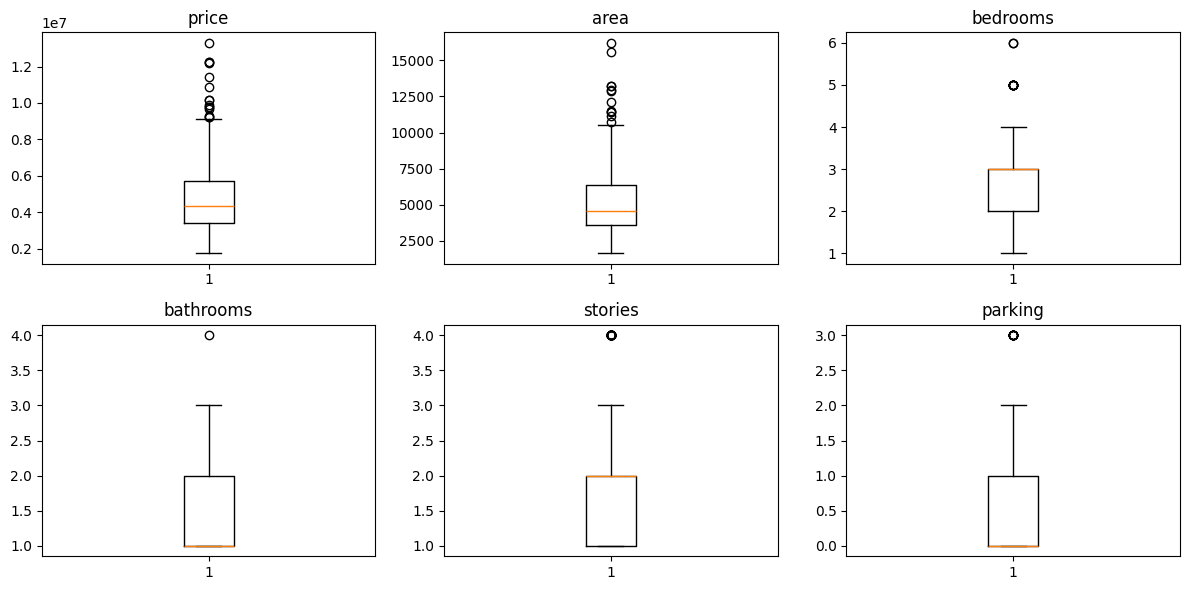

In [582]:
# Detect Outliers before Log Transformation
numeric_cols = ['price','area','bedrooms','bathrooms','stories','parking']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")
# Boxplots before log transform
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Skewness of numeric columns:
 price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64


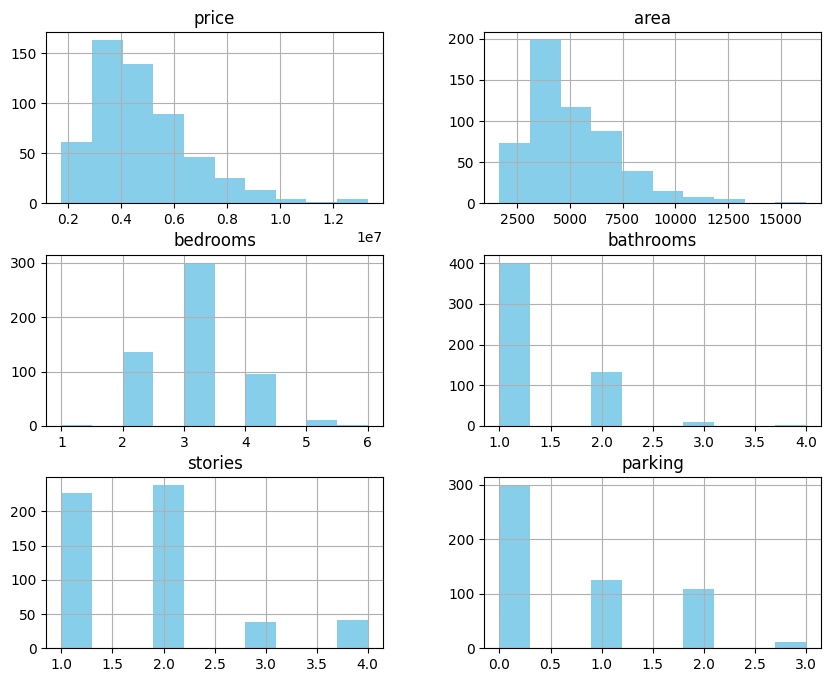

In [583]:
# Check Skewness and distribution of numeric columns
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
skewness = df[numeric_cols].skew()
print("Skewness of numeric columns:\n", skewness)

df[numeric_cols].hist(figsize=(10,8), color='skyblue')
plt.show()

Correlation of numeric columns:
               price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


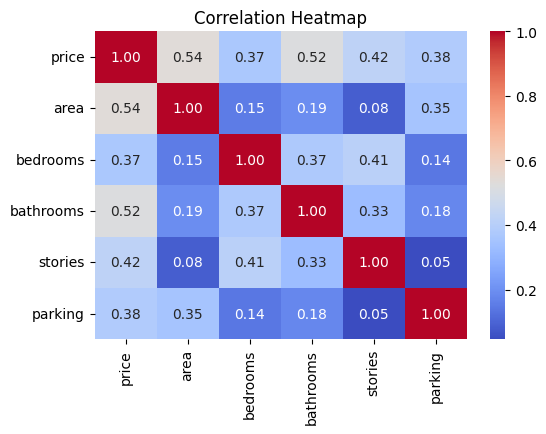

In [584]:
# Compute correlation for numeric columns
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cor = df[numeric_cols].corr()
print("Correlation of numeric columns:\n",cor)
plt.figure(figsize=(6,4))
sns.heatmap(cor, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [585]:
# Analyze categorical columns
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

for col in categorical_cols:
    print(df[col].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


Data Preprocessing

In [586]:
# Encode categorical variables
# Convert yes/no to 1/0
yes_no_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in yes_no_cols:
    df[col] = df[col].map({'yes':1,'no':0})

# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

Skewness after log transform:
price        0.140863
area         0.133747
bedrooms     0.495684
bathrooms    1.310299
stories      0.525950
parking      0.501800
dtype: float64


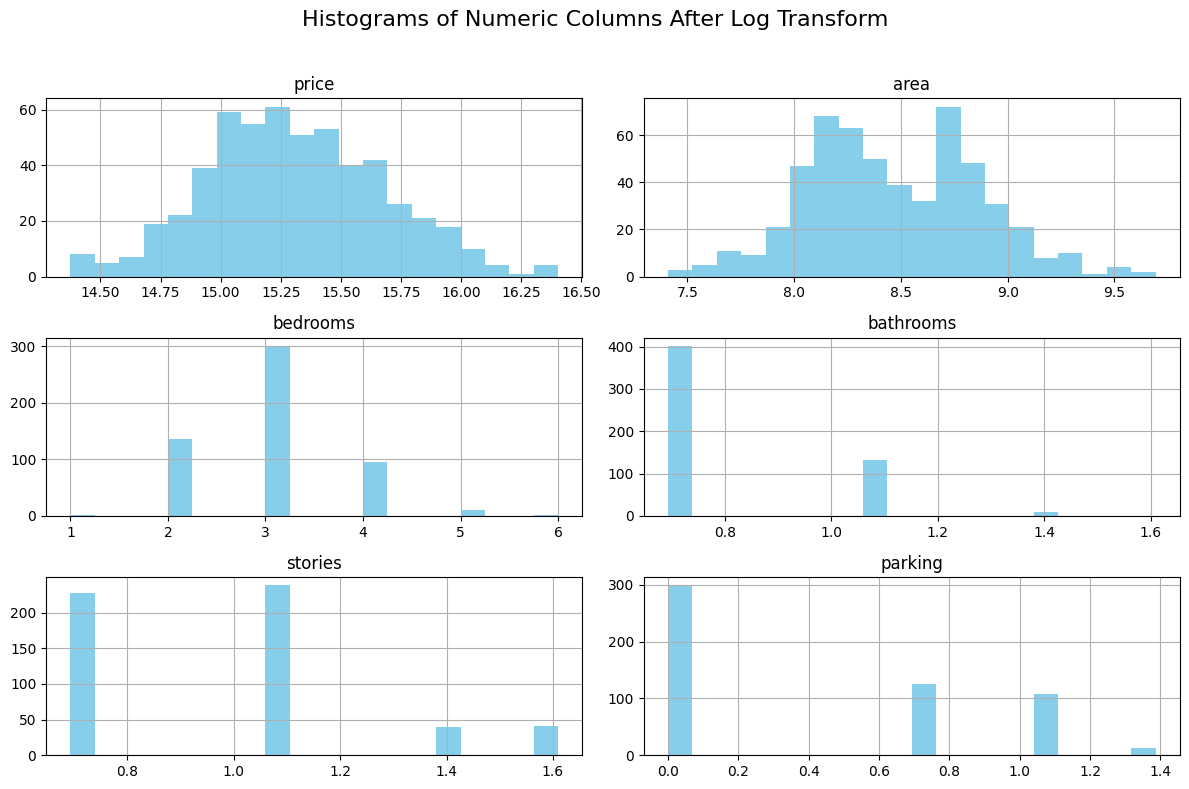

In [587]:
# Handle skewed numeric columns (log transformation)
skewed_cols = ['price','area','bathrooms','stories','parking']
for col in skewed_cols:
    df[col] = np.log1p(df[col])

# Check skewness after transformation
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
print("Skewness after log transform:")
print(df[numeric_cols].skew())

# Plot histograms after log transformation
df[numeric_cols].hist(figsize=(12,8), color='skyblue', bins=20)
plt.suptitle("Histograms of Numeric Columns After Log Transform", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


price: 1 outliers
area: 2 outliers
bedrooms: 12 outliers
bathrooms: 0 outliers
stories: 0 outliers
parking: 0 outliers


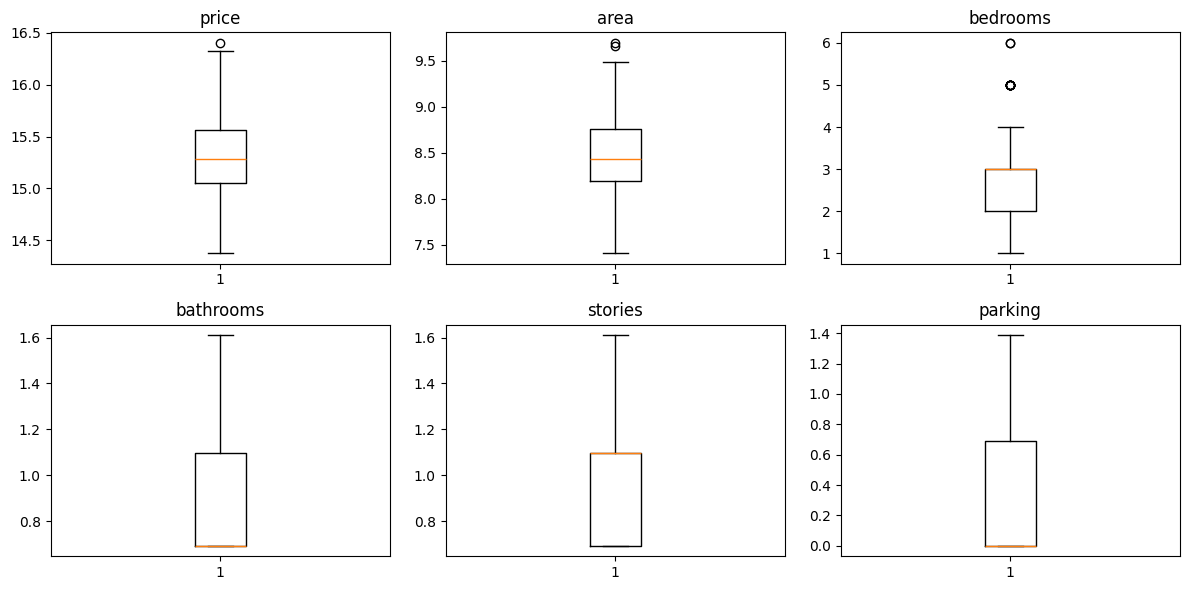

In [588]:
# Detect outliers using IQR after log transformation
numeric_cols = ['price','area','bedrooms','bathrooms','stories','parking']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")
    
# Boxplots after log transform
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [589]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,16.403275,8.912069,4,1.098612,1.386294,1,0,0,0,1,1.098612,1,False,False
1,16.321037,9.100637,4,1.609438,1.609438,1,0,0,0,1,1.386294,0,False,False
2,16.321037,9.206433,3,1.098612,1.098612,1,0,1,0,0,1.098612,1,True,False
3,16.318175,8.922792,4,1.098612,1.098612,1,0,1,0,1,1.386294,1,False,False
4,16.250001,8.912069,4,0.693147,1.098612,1,1,1,0,1,1.098612,0,False,False


Final Features & Target

In [590]:
# Select features and Target
X = df.drop('price', axis=1)
y = df['price']

In [591]:
print("Selected Features:")
X.head()

Selected Features:


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8.912069,4,1.098612,1.386294,1,0,0,0,1,1.098612,1,False,False
1,9.100637,4,1.609438,1.609438,1,0,0,0,1,1.386294,0,False,False
2,9.206433,3,1.098612,1.098612,1,0,1,0,0,1.098612,1,True,False
3,8.922792,4,1.098612,1.098612,1,0,1,0,1,1.386294,1,False,False
4,8.912069,4,0.693147,1.098612,1,1,1,0,1,1.098612,0,False,False


In [592]:
print("Target Variable:")
y.head()

Target Variable:


0    16.403275
1    16.321037
2    16.321037
3    16.318175
4    16.250001
Name: price, dtype: float64

In [593]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and Testing Data Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Training and Testing Data Shapes:
X_train: (436, 13)
X_test: (109, 13)


Fit Linear Regression

In [594]:
# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [595]:
# Coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print(coeff_df)

                            Feature  Coefficient
0                              area     0.299794
1                          bedrooms     0.017417
2                         bathrooms     0.481814
3                           stories     0.233820
4                          mainroad     0.089227
5                         guestroom     0.036749
6                          basement     0.098910
7                   hotwaterheating     0.125413
8                   airconditioning     0.150078
9                           parking     0.065370
10                         prefarea     0.132239
11  furnishingstatus_semi-furnished    -0.007322
12     furnishingstatus_unfurnished    -0.114157


In [596]:
# Make prediction on test set
y_pred = lr.predict(X_test)

Evaluate the Model

In [597]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

Model Evaluation Metrics:
R² Score: 0.682
MSE: 0.061
Root Mean Squared Error: 0.248


In [598]:
# Intercept
base_price = lr.intercept_
print(f"Base Price (Intercept): ₹{base_price:.2f}")


Base Price (Intercept): ₹11.91


Residual Analysis

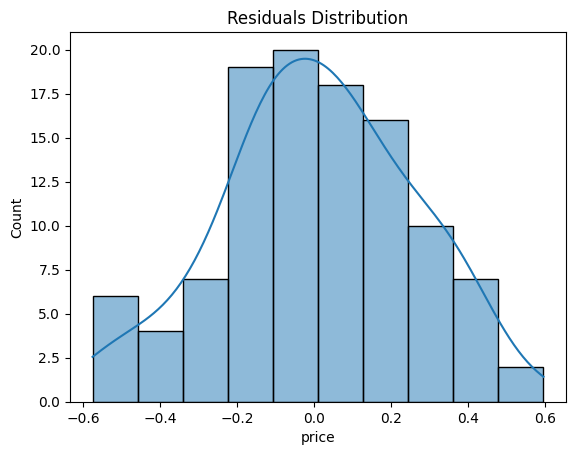

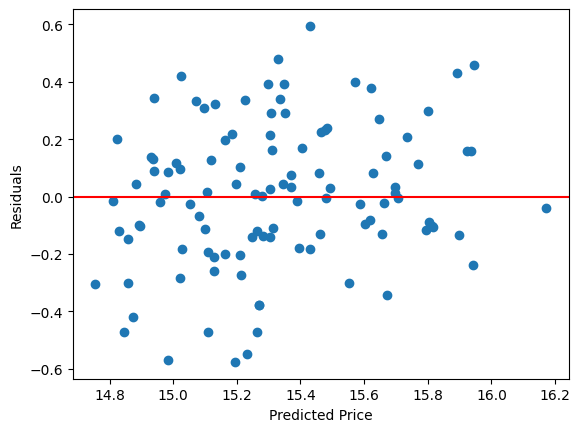

In [599]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

In [600]:
print(X.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


Predict Price for Given House - Area = 2500, Bedrooms = 3, Bathrooms = 2

In [601]:
# Create input for prediction (same columns as training)
new_house = pd.DataFrame(columns=X.columns)
new_house.loc[0] = 0

# Set values for the new house
new_house['area'] = np.log1p(2500)
new_house['bedrooms'] = 3
new_house['bathrooms'] = np.log1p(2)
new_house['stories'] = np.log1p(2)
new_house['parking'] = np.log1p(1)
new_house['mainroad'] = 1
new_house['guestroom'] = 0
new_house['basement'] = 0
new_house['hotwaterheating'] = 0
new_house['airconditioning'] = 1
new_house['prefarea'] = 1
new_house['furnishingstatus_semi-furnished'] = 0
new_house['furnishingstatus_unfurnished'] = 0

# Predict price
predicted_log_price = lr.predict(new_house)[0]
predicted_price = np.expm1(predicted_log_price)  # Convert back to original scale

print(f"Predicted House Price: ₹{predicted_price:,.2f}")

Predicted House Price: ₹5,435,800.86


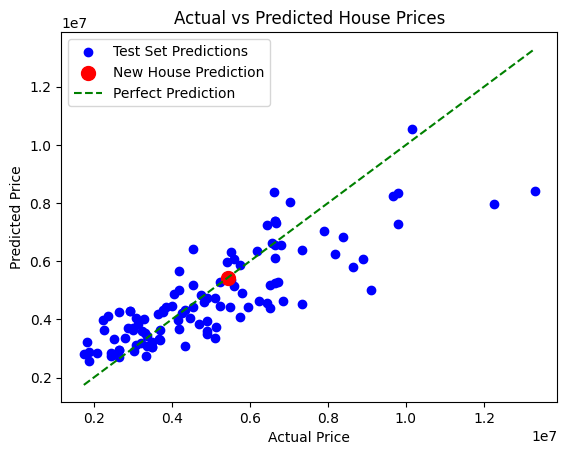

In [602]:
# Scatter plot of actual vs predicted prices for test set
plt.scatter(np.expm1(y_test), np.expm1(y_pred), color='blue', label='Test Set Predictions')

# Highlight the new house prediction
plt.scatter(predicted_price, predicted_price, color='red', s=100, label='New House Prediction')

# Perfect prediction line
plt.plot([min(np.expm1(y_test)), max(np.expm1(y_test))], [min(np.expm1(y_test)), max(np.expm1(y_test))], color='green', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()